In [26]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# scalling the input features
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
# creating validation set
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [27]:
# creating the model
model = keras.models.Sequential([
    keras.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# compiling the model
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])

Epoch 1/30


2025-08-16 21:27:37.966311: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7616 - loss: 0.7174 - val_accuracy: 0.8260 - val_loss: 0.5222
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8282 - loss: 0.4895 - val_accuracy: 0.8332 - val_loss: 0.4825
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8438 - loss: 0.4441 - val_accuracy: 0.8562 - val_loss: 0.4169
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8543 - loss: 0.4160 - val_accuracy: 0.8656 - val_loss: 0.3952
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8612 - loss: 0.3964 - val_accuracy: 0.8674 - val_loss: 0.3851
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8668 - loss: 0.3800 - val_accuracy: 0.8710 - val_loss: 0.3754
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8707 - loss: 0.3660 - val_accuracy: 0.8734 - val_loss: 0.3651
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8747 - loss: 0.3560 - val_accu

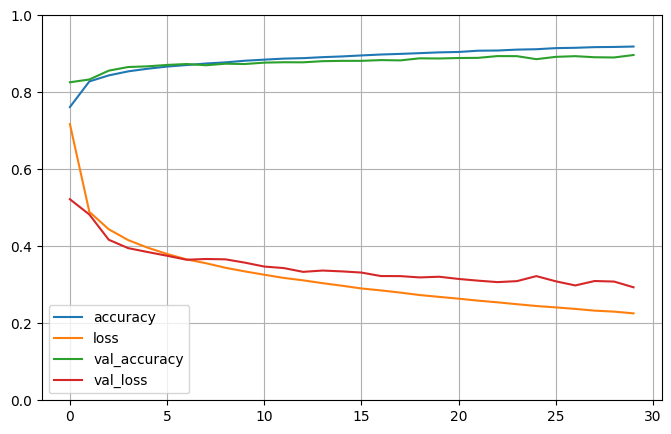

In [29]:
# training the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

# viewing the results
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [30]:
# avaliation with test set
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8439 - loss: 64.5731


[64.57312774658203, 0.8439000248908997]

In [32]:
# making prediction on test set

X_new = X_test[:30]
y_proba = model.predict(X_new)
y_new = y_test[:30]

# as classes preditas
y_pred_classes = np.argmax(y_proba, axis=1) # [1, 3, 4]

print("--- Predições e Rótulos Corretos ---")
for i in range(len(X_new)):
    print(f"\nInstância {i+1}:")
    print(f"  Probabilidades Estimadas (arredondadas): {y_proba[i].round(2)}") # [12, 13]
    print(f"  Classe Predita: {y_pred_classes[i]}") # [1]
    print(f"  Rótulo Verdadeiro: {y_new[i]}") # [1]
    if y_pred_classes[i] == y_new[i]:
        print("  -> Previsão CORRETA!")
    else:
        print("  -> Previsão INCORRETA.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
--- Predições e Rótulos Corretos ---

Instância 1:
  Probabilidades Estimadas (arredondadas): [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  Classe Predita: 9
  Rótulo Verdadeiro: 9
  -> Previsão CORRETA!

Instância 2:
  Probabilidades Estimadas (arredondadas): [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  Classe Predita: 2
  Rótulo Verdadeiro: 2
  -> Previsão CORRETA!

Instância 3:
  Probabilidades Estimadas (arredondadas): [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  Classe Predita: 1
  Rótulo Verdadeiro: 1
  -> Previsão CORRETA!

Instância 4:
  Probabilidades Estimadas (arredondadas): [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  Classe Predita: 1
  Rótulo Verdadeiro: 1
  -> Previsão CORRETA!

Instância 5:
  Probabilidades Estimadas (arredondadas): [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  Classe Predita: 6
  Rótulo Verdadeiro: 6
  -> Previsão CORRETA!

Instância 6:
  Probabilidades Estimadas (arredondadas): [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  Classe Predita: 1
  Rótulo Verdadeiro: 1
  -> Previsão CORR